#  Capstone Project -1 
## Predicting Customer Bank Churn
   Customer churn prediction is the process of using machine learning models to identify customers who are likely to leave in the near future.
## Objective
- To develop a machine learning model for Bank Churn Prediction, to potentially replace the updatable supervised machine learning classification models by predicting results in the form of best accuracy by comparing supervised algorithms.
- To reduce churn and increase profits of bank.

## About Dataset
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

__Introduction__

It is much more expensive to sign in a new client than keeping an existing one.

Thus, it is advantageous for banks to know what leads a client towards the decision to leave the company and churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

__Quick summary__

- Complain is the most important factor that causes customer to churn and we might say that the customer who possesses the following traits: complain, old age, and is not an active member is more likely to churn.

- The other traits of customers which are not mentioned above has low prediction power which means they are not important in prediction whether customers will churn or not.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 18)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### `Balance` column is having mean < median  therefore data is skewed .
     * `Balance` can have outliers *

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

- `RowNumber`, `Customer Id` and `Surname` columns will be dropped, because they have no impact on __churn__.
- `Gender` column's data will be converted from male, female to  0, 1
- `Geography` ,`Gender`,`Card Type` are __object__ data type.

In [6]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

 - There aren't any missing values in the dataset

<IPython.core.display.Javascript object>

<AxesSubplot:>

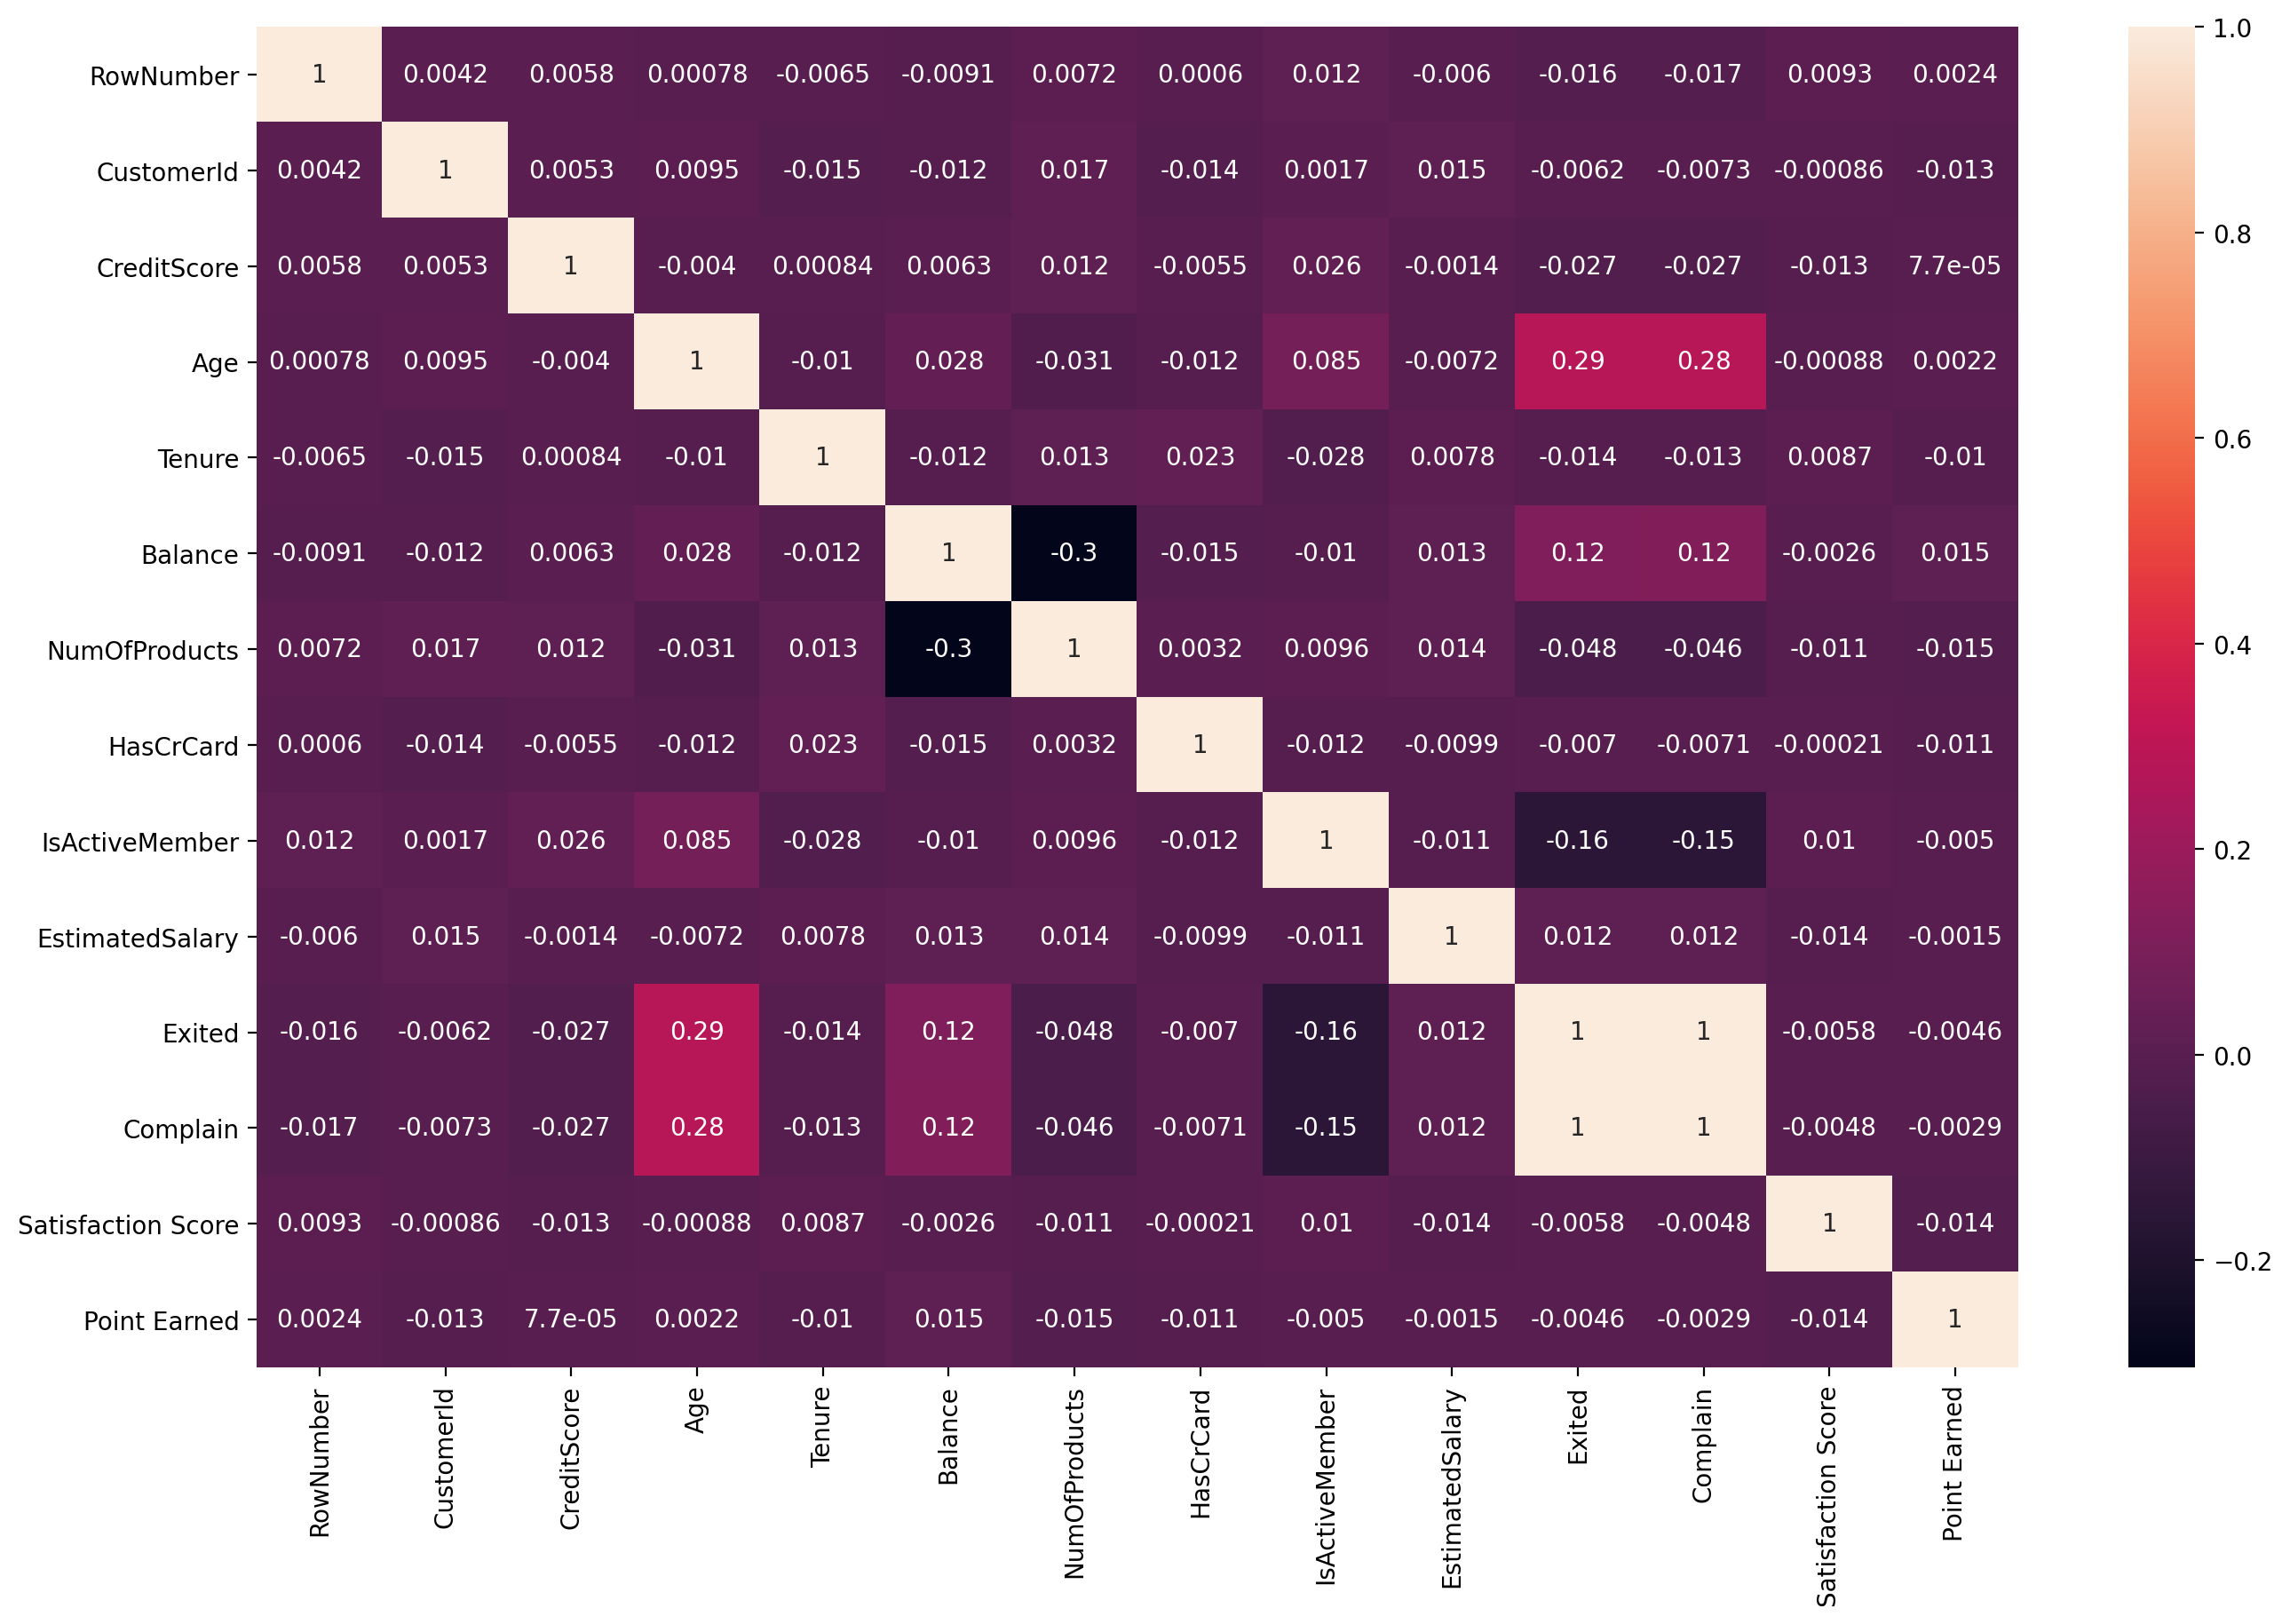

In [7]:
# Correlation Matrix
import seaborn as sns
plt.figure(figsize = (16, 10), dpi = 200)
sns.heatmap(df.corr(), annot = True)

- There is no correlation between any variable . 

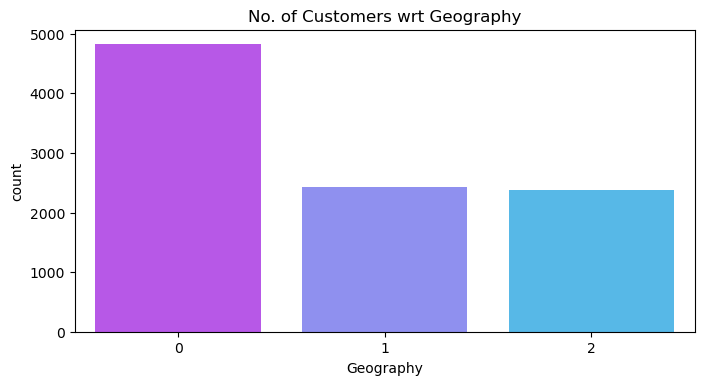

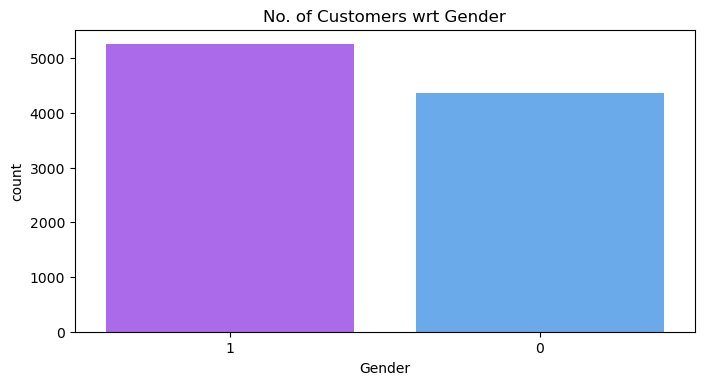

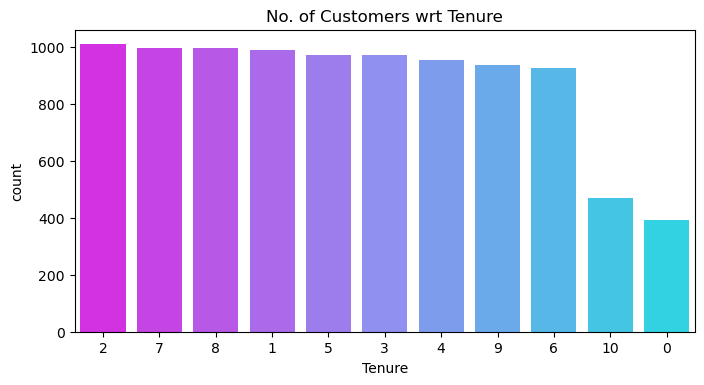

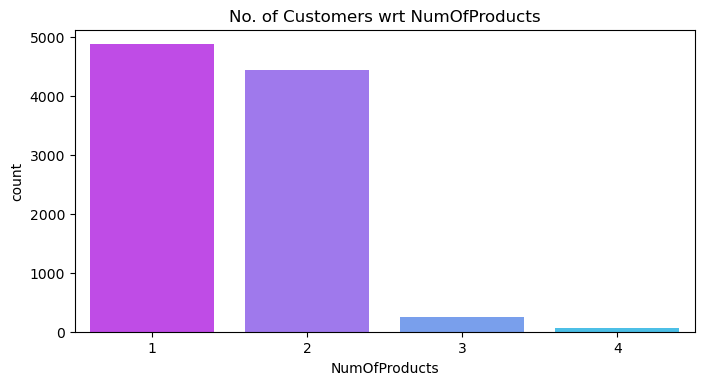

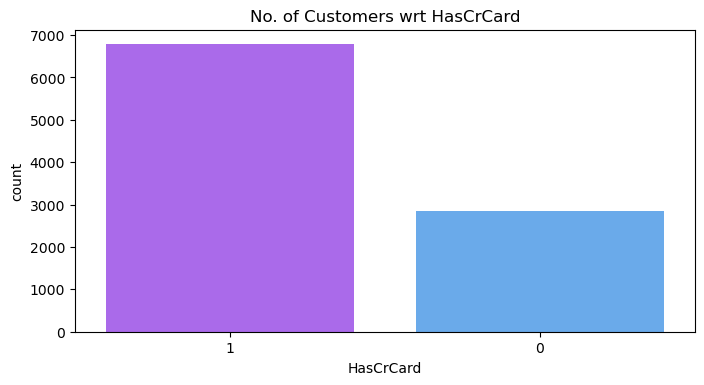

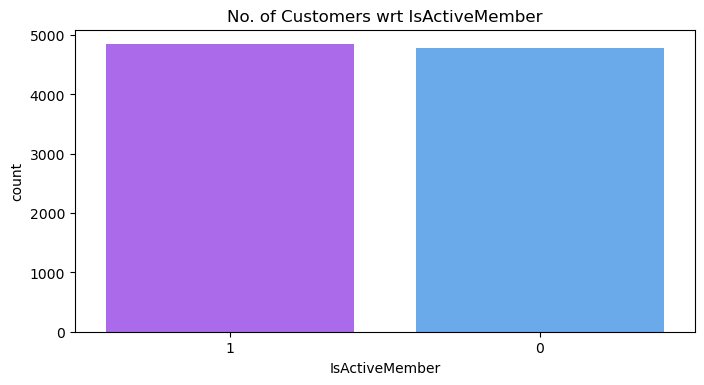

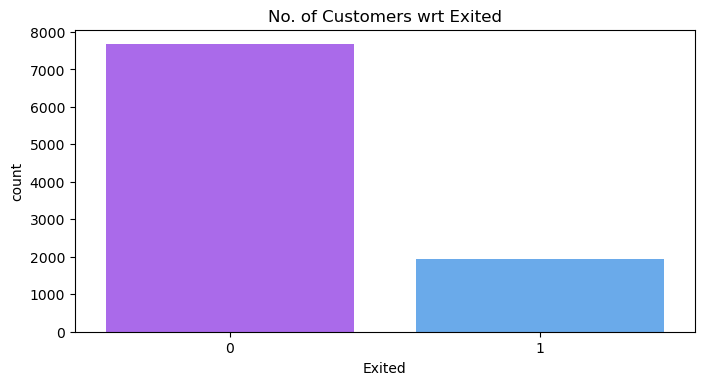

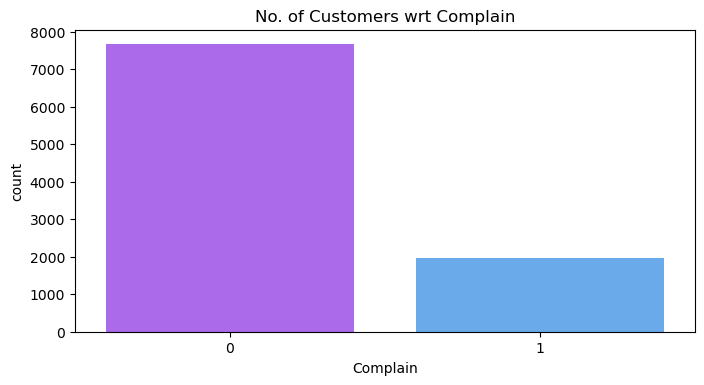

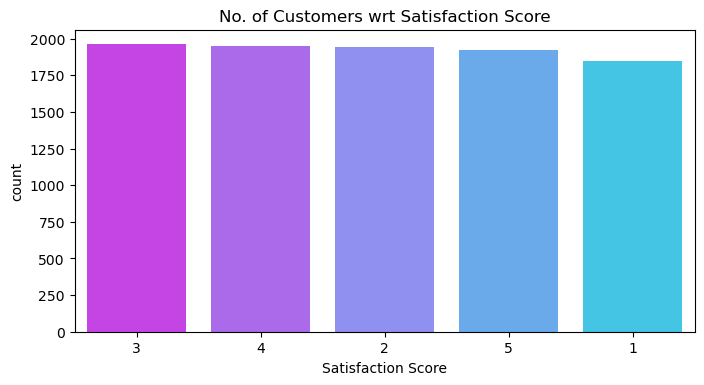

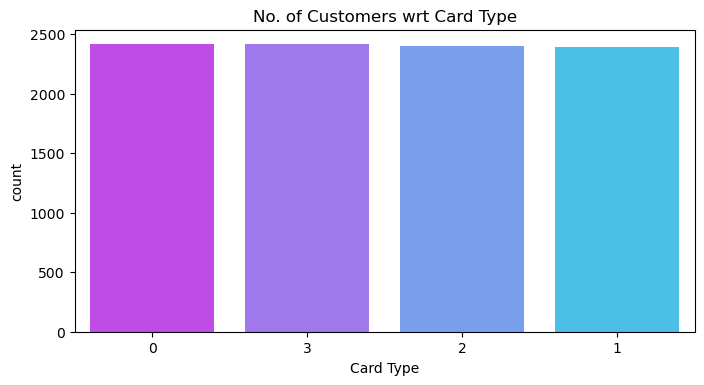

In [42]:
def countplot(x):
    for i in x:
        order = df[i].value_counts().sort_values(ascending = False).index
        plt.figure(figsize = (8,4), dpi = 100)
        sns.countplot(x = i, data = df, order = order, palette = 'cool_r')
        plt.title('No. of Customers wrt {}'.format(i))
        plt.show()
        
countplot(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


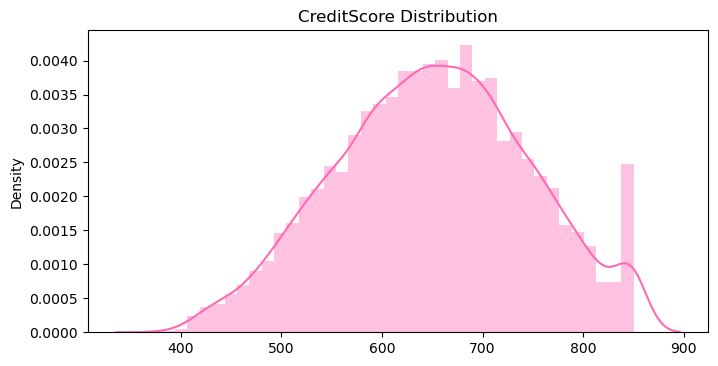

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


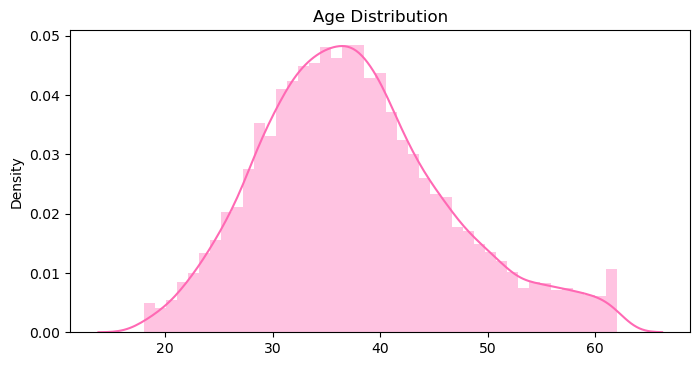

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


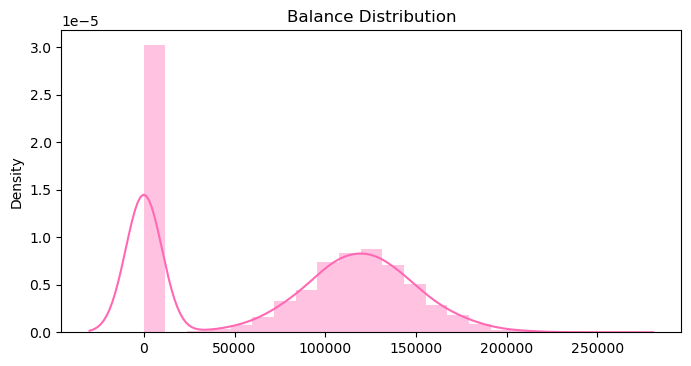

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


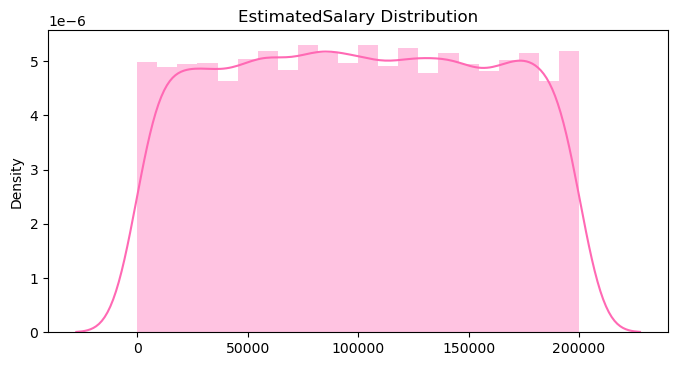

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


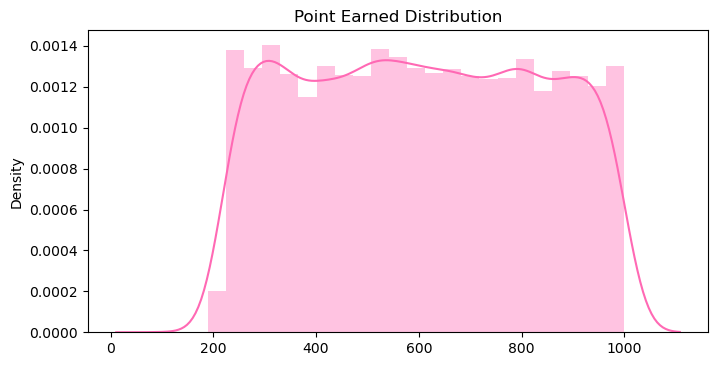

In [43]:
def distplot(x):
    for i in x:
        plt.figure(figsize = (8, 4), dpi = 100)
        sns.distplot(x = df[i], color = 'hotpink')
        plt.title('{} Distribution'.format(i))
        plt.show()
        
distplot(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'])

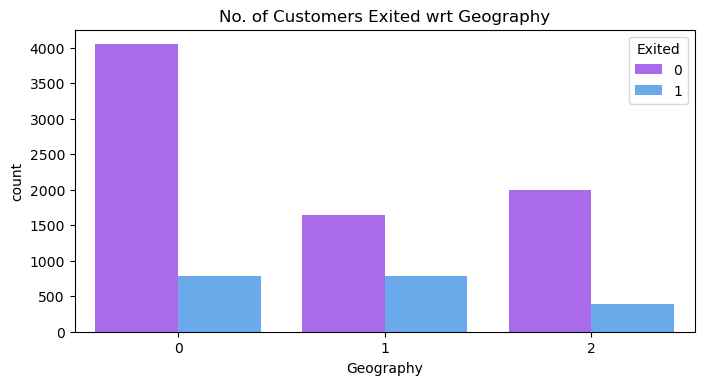

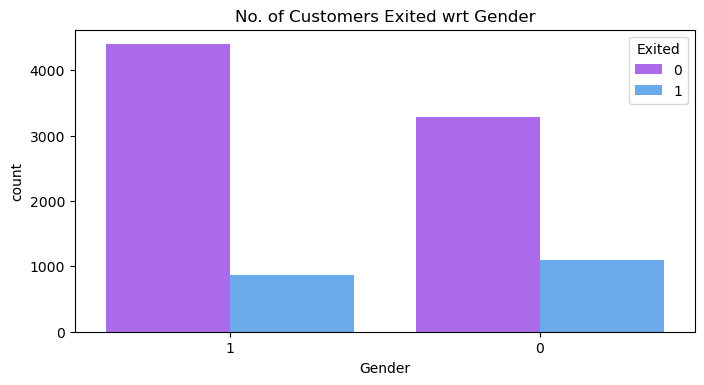

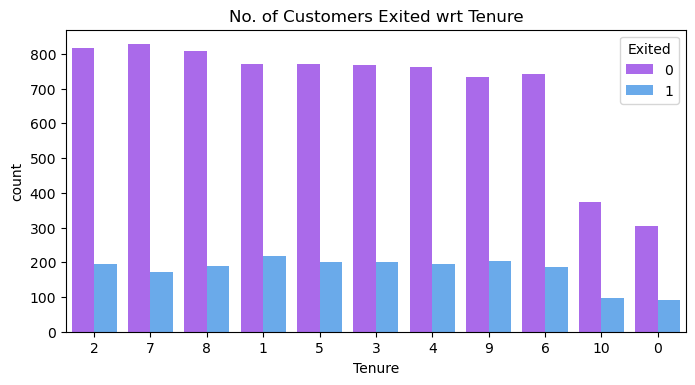

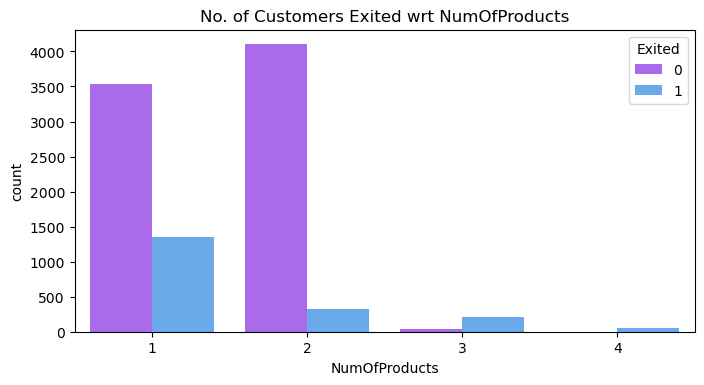

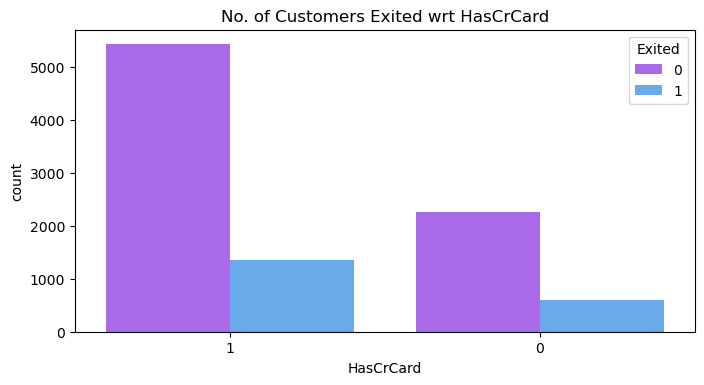

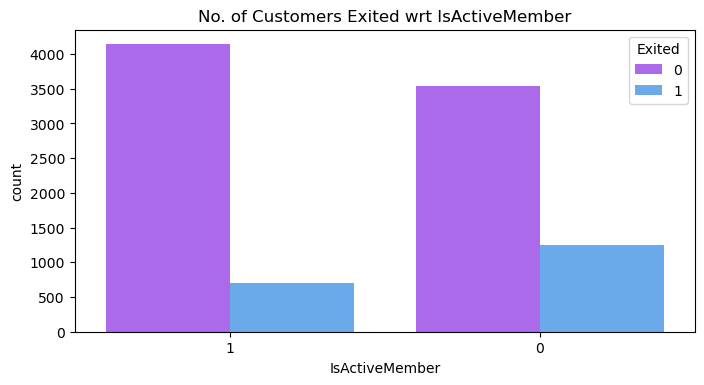

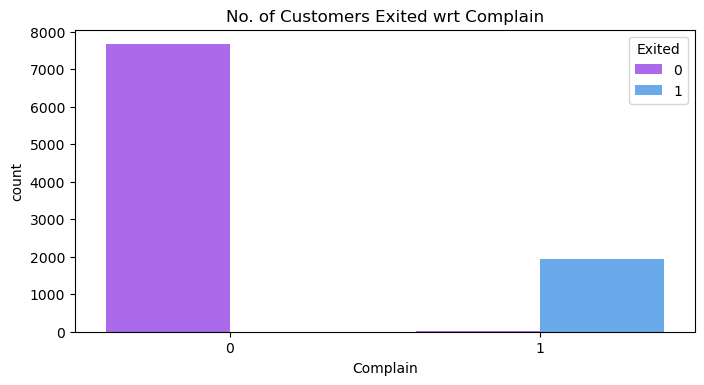

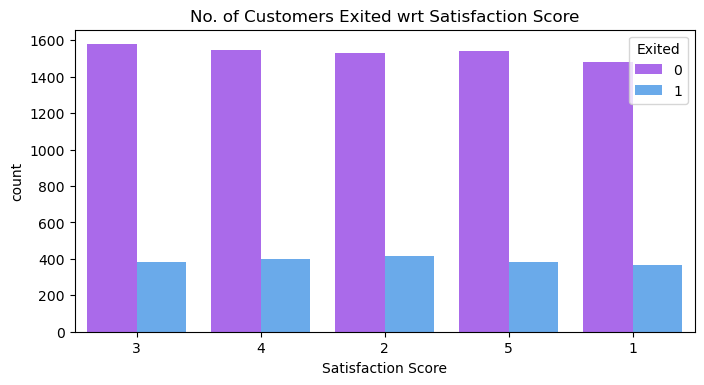

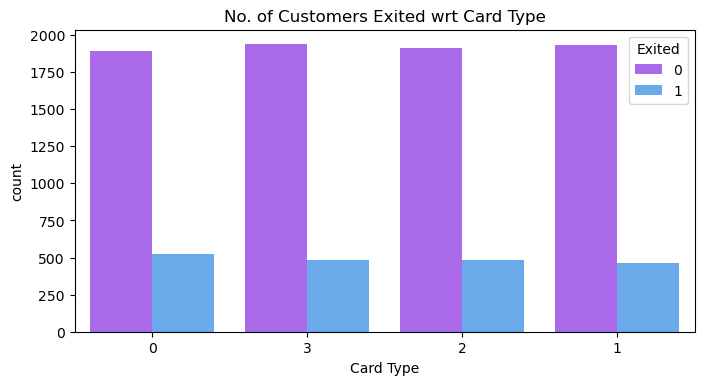

In [45]:
def countplot_for_exited(x):
    for i in x:
        order = df[i].value_counts().sort_values(ascending = False).index
        plt.figure(figsize = (8, 4), dpi = 100)
        sns.countplot(x = i, data = df, hue = df['Exited'],order = order, palette = 'cool_r')
        plt.title('No. of Customers Exited wrt {}'.format(i))
        plt.show()
        
countplot_for_exited(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
                      'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type'])

- Females having a relatively higher count of churned customers.
- The number of products held by customers can impact churn. Customers with fewer products may be less likely to churn, while those with more products may have a higher churn rate.
- Germany stands out in terms of having a relatively higher count of churned customers.
- Customer activity status is another important factor. Active members appear to have a lower churn rate compared to inactive members. This suggests that engaged and active customers are more likely to stay with the bank.
- DIAMOND Card Type having a relatively higher count of churned customers.

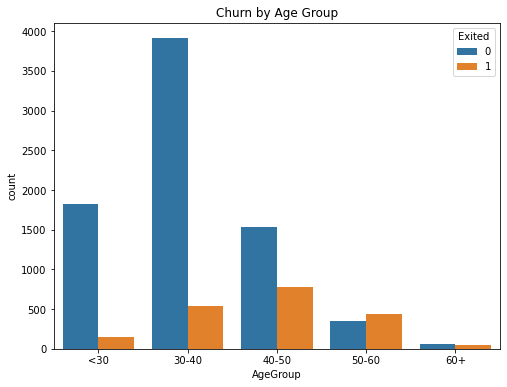

In [63]:
# Churn by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

In [8]:
#Identify the outliers

lower = df['Balance'].quantile(0.25)
upper = df['Balance'].quantile(0.75)
iqr = upper -lower

lower_limit = lower - 1.5*iqr
upper_limit = upper + 1.5*iqr

df = df[~((df['Balance'] < lower_limit) | (df['Balance'] > upper_limit))]
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

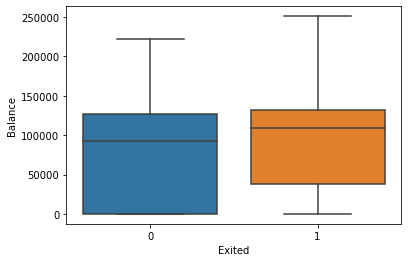

In [9]:
sns.boxplot(x = 'Exited', y = 'Balance',  data =df)

<AxesSubplot:xlabel='Age'>

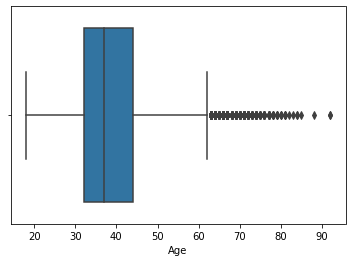

In [10]:
sns.boxplot(x ='Age', data =df)

In [11]:
df = df[(df['Age'] <= 62)]

<AxesSubplot:xlabel='CreditScore'>

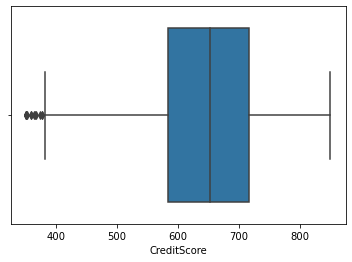

In [12]:
sns.boxplot(x ='CreditScore', data =df)

In [13]:
df = df[(df['CreditScore'] >= 382)]

In [14]:
df.shape

(9627, 18)

In [15]:
print(df['Card Type'].unique())
print(df['Geography'].unique())

['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
['France' 'Spain' 'Germany']


- __Converting Categorical variables into numeric values__


In [16]:
# using label encoder because categorical variable is nominal.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df['Geography'] = LE.fit_transform(df['Geography'])
df['Card Type'] = LE.fit_transform(df['Card Type'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


- Creating Dependent and Independent Features Datasets

In [17]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
Y = df['Exited']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

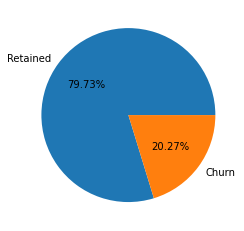

In [20]:
import matplotlib.pyplot as plt
plt.pie(df["Exited"].value_counts(), labels=["Retained", "Churn"], autopct="%0.2f%%")
plt.show()

- As we can see, the target variable is imbalance.

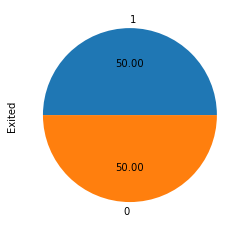

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = ros.fit_resample(x_train,y_train)

ax = y_train.value_counts().plot.pie(autopct = '%.2f')


In [26]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
lr_pred_train = lr_classifier.predict(x_train)
lr_pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, lr_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, lr_pred_test))

Training Accuracy :  0.9982960077896786
Testing Accuracy  :  0.9994807892004154


In [28]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, lr_pred_test)
cnf_matrix

array([[1513,    1],
       [   0,  412]], dtype=int64)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred_test))
print("Precision:",metrics.precision_score(y_test, lr_pred_test))
print("Recall:",metrics.recall_score(y_test, lr_pred_test))

Accuracy: 0.9994807892004154
Precision: 0.9975786924939467
Recall: 1.0


# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 100, random_state = 15)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=15)

In [31]:
dt_pred_train = dt_classifier.predict(x_train)
dt_pred_test = dt_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, dt_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, dt_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.9989615784008308


In [32]:
cnf_matrix = confusion_matrix(y_test, dt_pred_test)
cnf_matrix

array([[1513,    1],
       [   1,  411]], dtype=int64)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test,dt_pred_test ))
print("Precision:",metrics.precision_score(y_test, dt_pred_test))
print("Recall:",metrics.recall_score(y_test, dt_pred_test))

Accuracy: 0.9989615784008308
Precision: 0.9975728155339806
Recall: 0.9975728155339806


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 150, max_depth = 50)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=150)

In [35]:
rf_pred_train = rf_classifier.predict(x_train)
rf_pred_test = rf_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, rf_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, rf_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.9994807892004154


In [36]:
cnf_matrix = confusion_matrix(y_test, rf_pred_test)
cnf_matrix

array([[1513,    1],
       [   0,  412]], dtype=int64)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test,rf_pred_test ))
print("Precision:",metrics.precision_score(y_test, rf_pred_test))
print("Recall:",metrics.recall_score(y_test, rf_pred_test))

Accuracy: 0.9994807892004154
Precision: 0.9975786924939467
Recall: 1.0


## Conclusion
- If a customer complains, there is a very high chance that they will churn and vice versa.
- If the customer is not an active member, they are more likely to churn.
- Interestingly, being a german contributes to the probability to churn. However, the effect is minute.
- In summary, complain is the biggest factor that causes customer to churn and we might say that the customer who possesses the following traits: complains, old age, and is not an active member is more likely to churn.

In [46]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


# Chi sq test for Association
__Null hypothesis__:There is no relation between the variables. 

__Alternate hypothesis__: There is a significant relationship between the two variables. 

## CRAMER’S V TEST:
Cramer’s V is a measure of association between two nominal variables. It is based on Pearson's chi-squared statistic.

- Value of V 	__Interpretation__
- V>0.25	__Very strong__
- V>0.15	__Strong__
- V>0.10	__Moderate__
- V>0.05	__Weak__
- V>0	    __No or very weak__

In [51]:
data_crosstab = pd.crosstab(df['IsActiveMember'],
                            df['Exited'], 
                               margins = False)
print(data_crosstab)

Exited             0     1
IsActiveMember            
0               3533  1246
1               4143   705


In [55]:
from scipy.stats import chi2_contingency
 
# defining the table
stat, p, dof, expected = chi2_contingency(data_crosstab)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 8.133578745153053e-45
Dependent (reject H0)


In [68]:
data=np.array([[3533,1246],[4143,705],])
# Finding Chi-squared test statistic,
# sample size, and minimum of rows
# and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
N = np.sum(data)
minimum_dimension = min(data.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

<IPython.core.display.Javascript object>

0.14341517146895827


In [56]:
data_crosstab = pd.crosstab(df['Complain'],
                            df['Exited'], 
                               margins = False)
print(data_crosstab)

Exited       0     1
Complain            
0         7666     4
1           10  1947


In [57]:
# defining the table
stat, p, dof, expected = chi2_contingency(data_crosstab)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [67]:
data=np.array([[7666,4],[10,1947],])
# Finding Chi-squared test statistic,
# sample size, and minimum of rows
# and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
N = np.sum(data)
minimum_dimension = min(data.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

<IPython.core.display.Javascript object>

0.9955071647308735


In [59]:
data_crosstab = pd.crosstab(df['Geography'],
                            df['Exited'], 
                               margins = False)
print(data_crosstab)

Exited        0    1
Geography           
0          4048  778
1          1640  781
2          1988  392


In [60]:
# defining the table
stat, p, dof, expected = chi2_contingency(data_crosstab)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.8368554346828344e-63
Dependent (reject H0)


In [66]:
data=np.array([[4048,778],[1640,781],[1988,392]])
# Finding Chi-squared test statistic,
# sample size, and minimum of rows
# and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
N = np.sum(data)
minimum_dimension = min(data.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

<IPython.core.display.Javascript object>

0.17297413340765808


In [61]:
# Churn by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
data_crosstab = pd.crosstab(df['AgeGroup'],
                            df['Exited'], 
                               margins = False)
print(data_crosstab)

Exited       0    1
AgeGroup           
<30       1820  145
30-40     3912  537
40-50     1532  784
50-60      349  443
60+         63   42


In [62]:
# defining the table
stat, p, dof, expected = chi2_contingency(data_crosstab)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.869786330086921e-280
Dependent (reject H0)


In [65]:

data=np.array([[1820,145],[3912,537],[1532,784],[349,443],[63,42]])
# Finding Chi-squared test statistic,
# sample size, and minimum of rows
# and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
N = np.sum(data)
minimum_dimension = min(data.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

<IPython.core.display.Javascript object>

0.3675155643260048


### conclusion
- From chi sq test we can see tha there is associasion between customer Active member and churn.
- From chi sq test we can see tha there is associasion between customer complains and churn.
- From chi sq test we can see tha there is associasion between customer Geography and churn.
- From chi sq test we can see tha there is associasion between customer Age group and churn.
#### percentage of association
- percentage of association between Active member and churn is __0.1434 i.e strong association.__
- percentage of association between complains and churn is __0.9955 i.e Very strong association.__
- percentage of association between Geography and churn is __0.1729 i.e Very strong association.__
- percentage of association between Age group and churn is __0.3675 i.e Very strong association.__

## CRAMER’S V TEST:
Cramer’s V is a measure of association between two nominal variables. It is based on Pearson's chi-squared statistic.

- Value of V 	__Interpretation__
- V>0.25	__Very strong__
- V>0.15	__Strong__
- V>0.10	__Moderate__
- V>0.05	__Weak__
- V>0	    __No or very weak__
